In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time

warnings.filterwarnings('ignore')

In [6]:
df_wine_data = pd.read_csv('games_details.csv', sep=',')
df_wine_data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [89]:
def EDA(df):
    
    #dimensao
    print('linhas: {} e colunas: {}'.format(df.shape[0], df.shape[1]))
    print('-------------------------------')

    #valores duplicados
    print('Quantidade de linhas duplicadas: '.format(df.duplicated().sum()))
    print('-------------------------------')

    #% de valores nulos por coluna
    print('Percentual de valores nulos por coluna:')
    values_null = pd.DataFrame(df.isnull().sum())
    values_null.reset_index(inplace=True)
    values_null['% null'] = values_null[0]/df.shape[0]
    display(values_null)
    print('-------------------------------')

    #tipo de cada coluna
    print('Tipo de cada coluna')
    display(df.dtypes)
    print('-------------------------------')

    #Descrição estatistica de cada coluna
    print('Estatísticas descritivas básicas de cada coluna')
    display(df.describe())
    display(df.info())
    print('-------------------------------')

    



In [90]:
EDA(df)

linhas: 668628 e colunas: 29
-------------------------------
Quantidade de linhas duplicadas: 
-------------------------------
Percentual de valores nulos por coluna:


,index,0,% null
0,GAME_ID,0,0.000000
1,TEAM_ID,0,0.000000
2,TEAM_ABBREVIATION,0,0.000000
3,TEAM_CITY,0,0.000000
4,PLAYER_ID,0,0.000000
5,PLAYER_NAME,0,0.000000
6,NICKNAME,615591,0.920678
7,START_POSITION,412863,0.617478
8,COMMENT,558939,0.835949
9,MIN,109690,0.164052


-------------------------------
Tipo de cada coluna


GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

-------------------------------
Estatísticas descritivas básicas de cada coluna


,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.686280e+05,6.686280e+05,6.686280e+05,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,...,558938.000000,558938.000000,558938.00000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,535277.000000
mean,2.171771e+07,1.610613e+09,4.013434e+05,3.588446,7.896652,0.416842,0.778117,2.186019,0.201032,1.733217,...,1.024212,3.033798,4.05801,2.103958,0.721436,0.460339,1.320297,1.999538,9.688218,-0.000488
std,5.656289e+06,8.652260e+00,7.225618e+06,3.030466,5.677002,0.251913,1.227615,2.569913,0.289685,2.353981,...,1.397830,2.687384,3.48250,2.475476,0.972231,0.860962,1.402329,1.502963,8.082152,10.665573
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.070003e+07,1.610613e+09,2.466000e+03,1.000000,3.000000,0.267000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120096e+07,1.610613e+09,2.011810e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,3.00000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.180014e+07,1.610613e+09,2.034710e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.400000,3.000000,...,2.000000,4.000000,6.00000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.210021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,18.000000,25.000000,31.00000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

None

-------------------------------


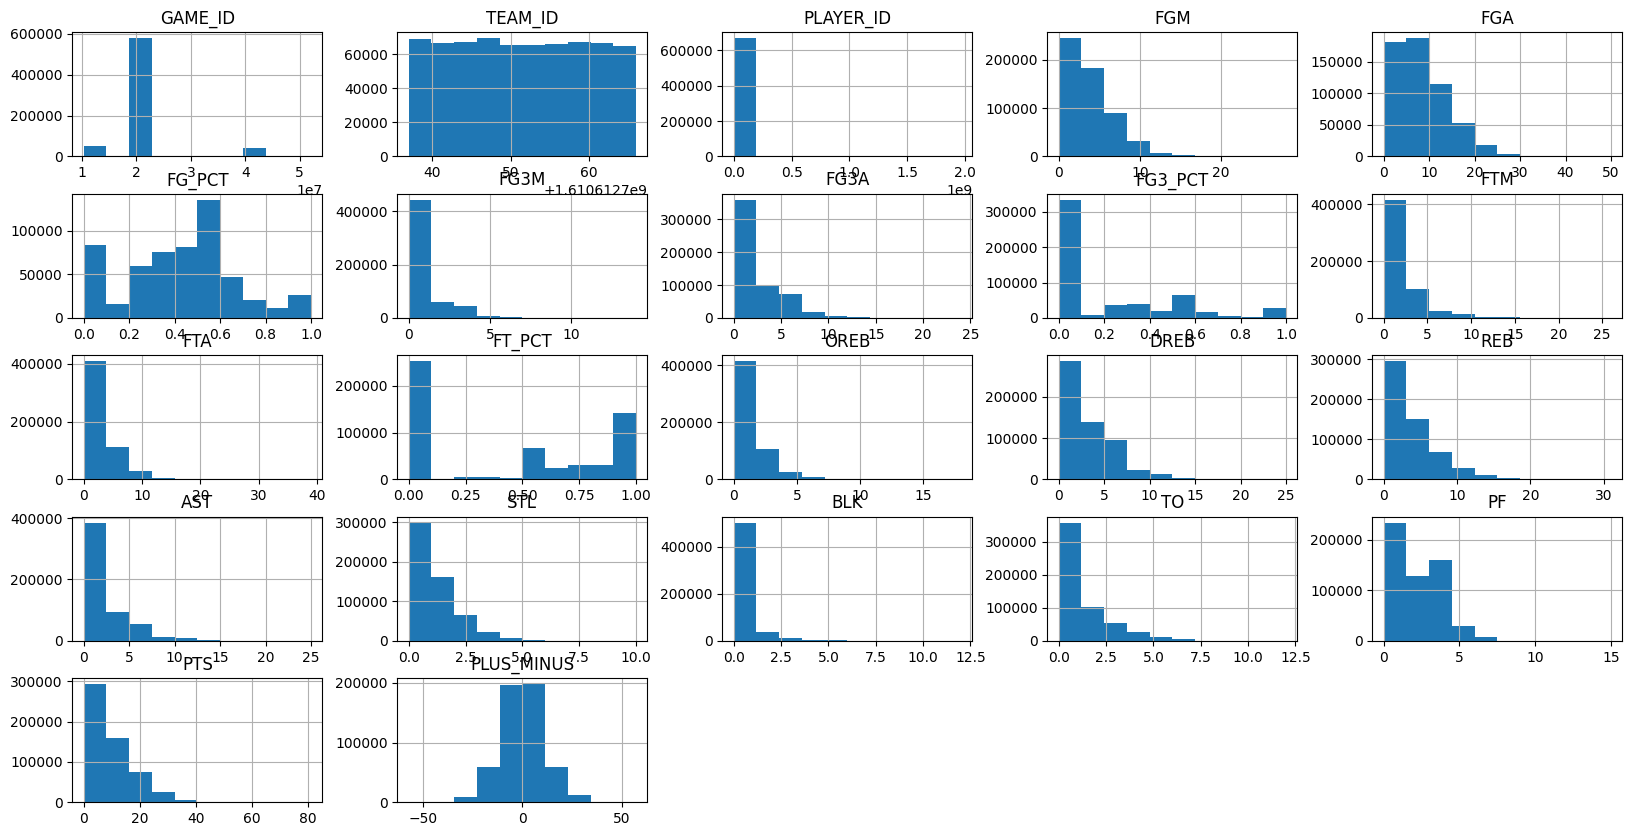

In [88]:
df_wine_data.hist(figsize=(20,10));